In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2

import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [15]:
filelist = glob.glob('Figs1/*.tiff')
filelist.sort(key=natural_keys)
frames = np.array([np.array(cv2.imread(fname, 0)) for fname in filelist])


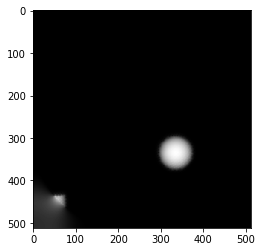

In [16]:
plt.imshow(frames[0], cmap="gray")

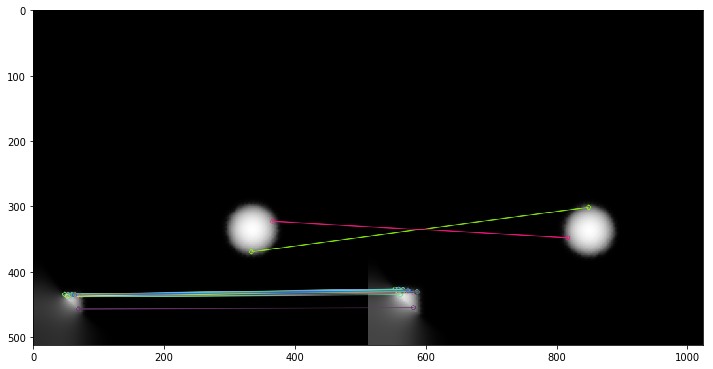

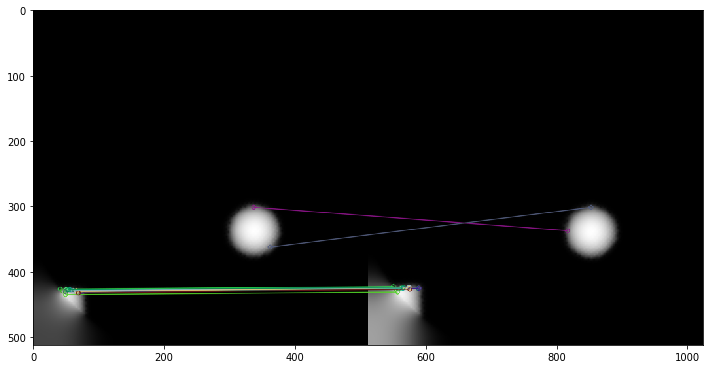

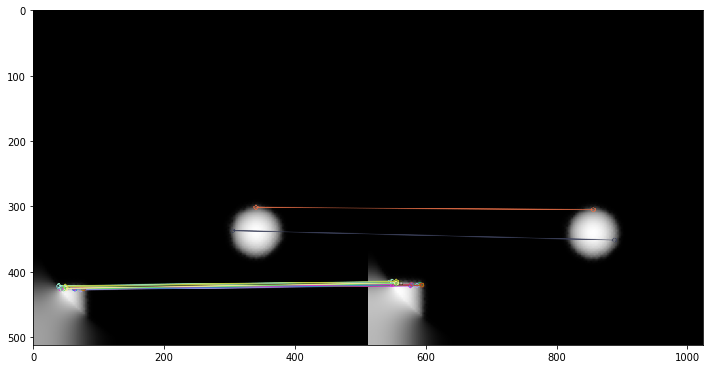

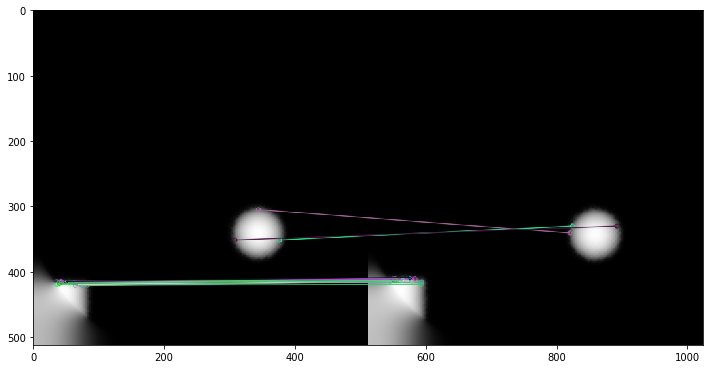

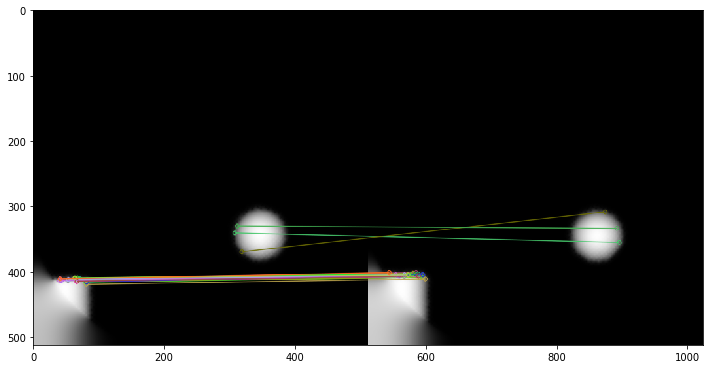

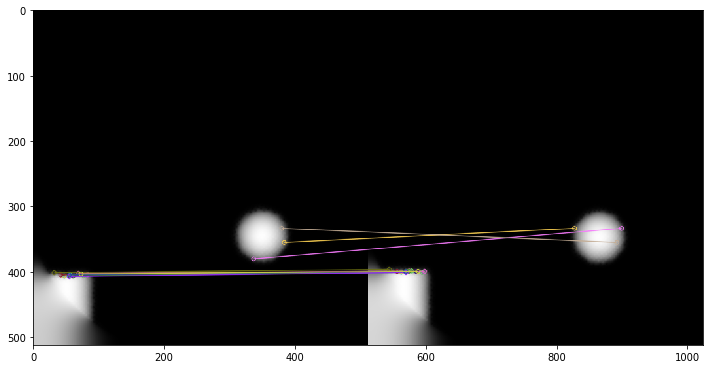

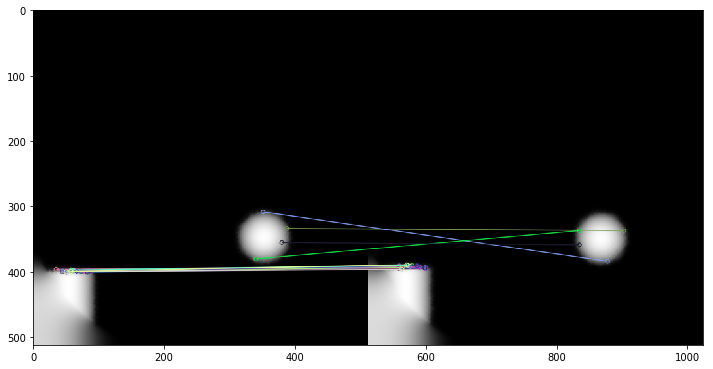

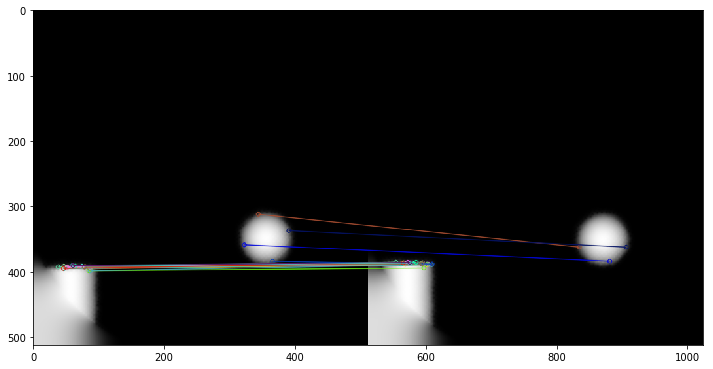

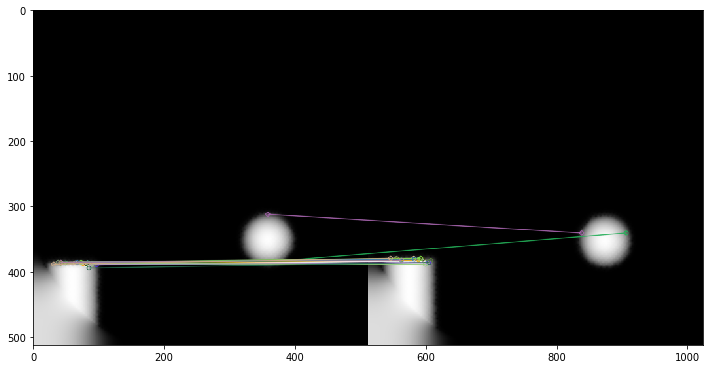

In [24]:
# attempt at raw SIFT
frame_prev = frames[0]
# create SIFT object
orb = cv2.ORB_create()
for frame in frames[1:10]:         
    kp_prev, des_prev = orb.detectAndCompute(frame_prev, None)
    kp_curr, des_curr = orb.detectAndCompute(frame,None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des_prev,des_curr)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # It requires an out object for some reason
    out = np.zeros_like(frame)

    # Look at first 40 matches
    out = cv2.drawMatches(frame_prev, kp_prev,frame,kp_curr,matches[:40], out, flags=2)

    plt.figure(figsize=(12,12))
    plt.imshow(out),plt.show()
    
    frame_prev = frame

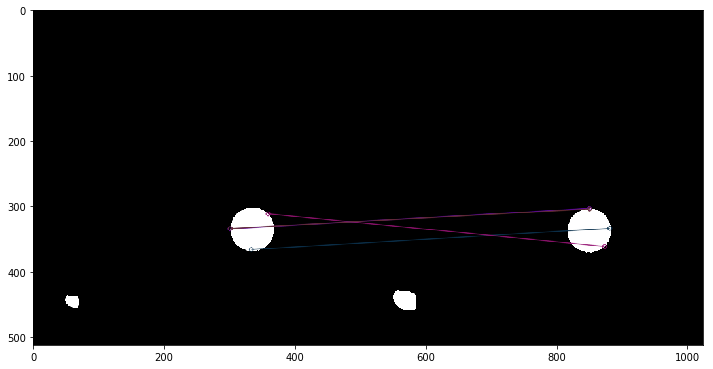

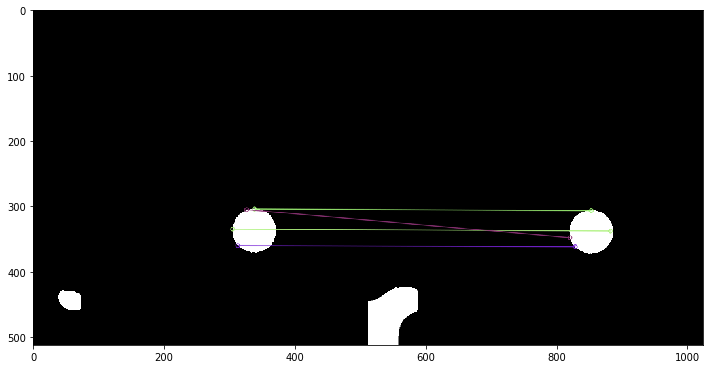

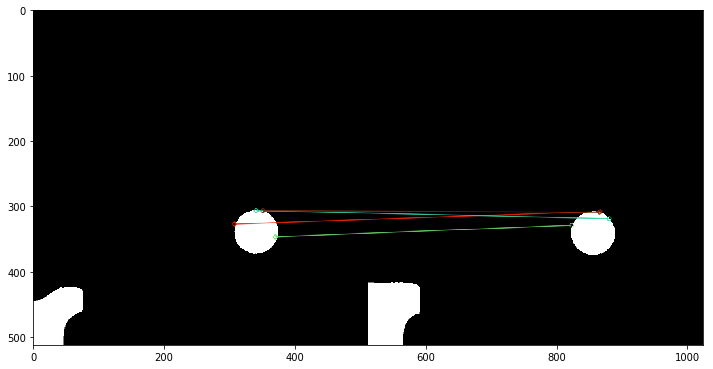

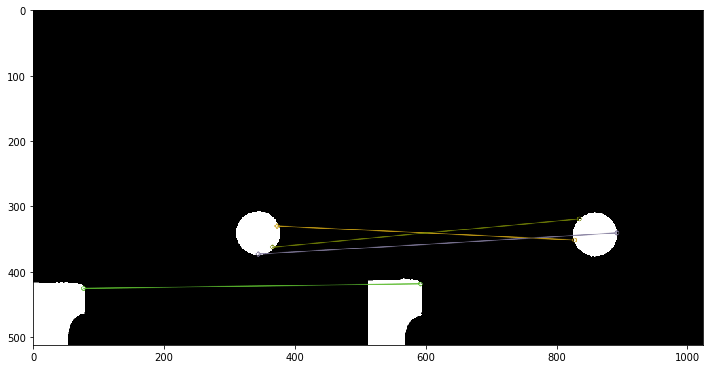

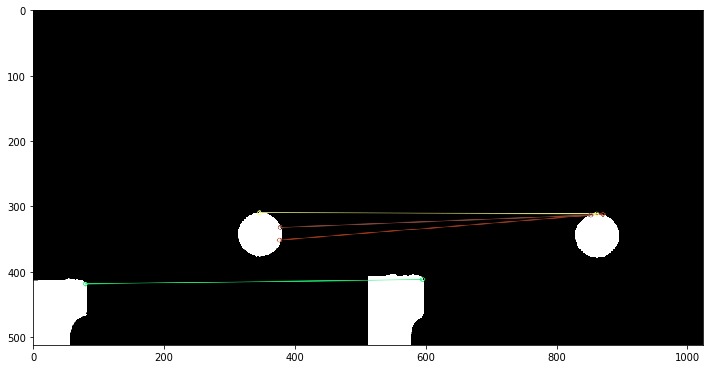

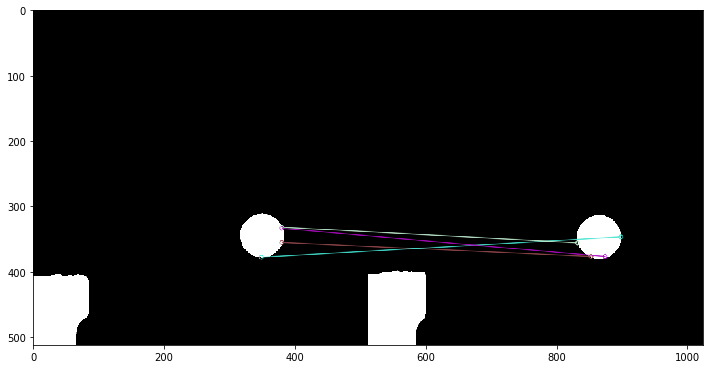

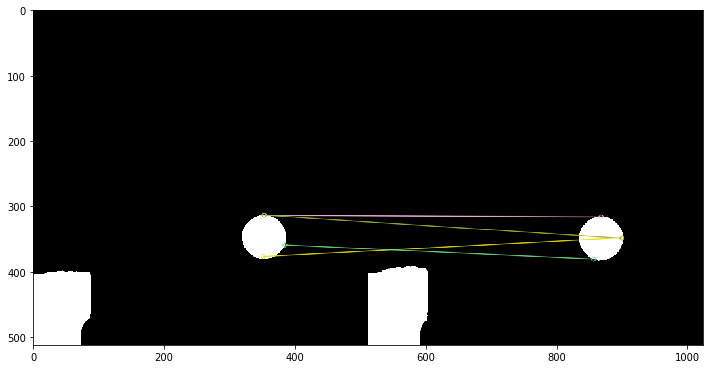

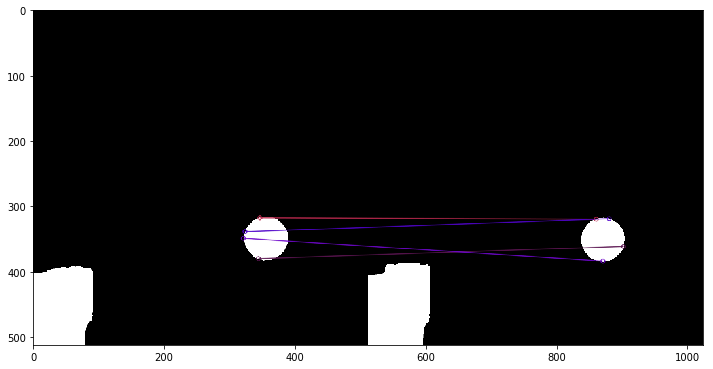

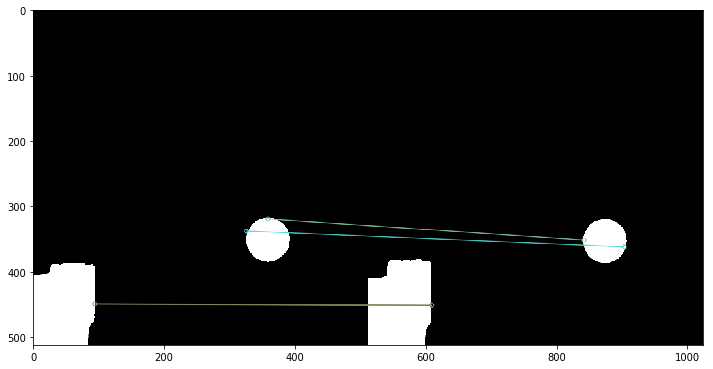

In [26]:
# attempt at raw SIFT with basic thresholding
frame_prev = frames[0]
frame_prev[frame_prev < 128] = 0
frame_prev[frame_prev > 128] = 255
# create SIFT object
orb = cv2.ORB_create()
for frame in frames[1:10]:        
    frame[frame < 128] = 0
    frame[frame > 128] = 255
    
    kp_prev, des_prev = orb.detectAndCompute(frame_prev, None)
    kp_curr, des_curr = orb.detectAndCompute(frame,None)
    
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des_prev,des_curr)

    # Sort them in the order of their distance.
    matches = sorted(matches, key = lambda x:x.distance)

    # It requires an out object for some reason
    out = np.zeros_like(frame)

    # Look at first 40 matches
    out = cv2.drawMatches(frame_prev, kp_prev,frame,kp_curr,matches[:4], out, flags=2)

    plt.figure(figsize=(12,12))
    plt.imshow(out),plt.show()
    
    frame_prev = frame